# PCA 2D

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
x1=np.array([1,2,3,4,5,6])
x2=np.array([7.5,11,16,18,20,26])

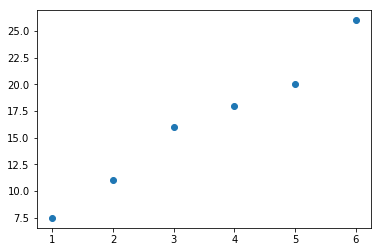

In [3]:
plt.scatter(x1,x2)
plt.show()

In [4]:
X=np.c_[x1,x2] # combining two arrays
X


array([[ 1. ,  7.5],
       [ 2. , 11. ],
       [ 3. , 16. ],
       [ 4. , 18. ],
       [ 5. , 20. ],
       [ 6. , 26. ]])

In [5]:
pca=PCA()
X_transformed=pca.fit_transform(X)
X_transformed 
# finds new dimension which stores that much data

array([[-9.26049952e+00,  9.65263430e-03],
       [-5.62047228e+00,  2.38560598e-02],
       [-5.36562171e-01, -3.68391297e-01],
       [ 1.65958219e+00,  5.22629108e-02],
       [ 3.85572654e+00,  4.72917119e-01],
       [ 9.90222524e+00, -1.90297426e-01]])

In [6]:
pca.components_

array([[ 0.27096719,  0.96258858],
       [ 0.96258858, -0.27096719]])

In [7]:
pca=PCA(n_components=1)
X_transformed=pca.fit_transform(X)
X_transformed 

array([[-9.26049952],
       [-5.62047228],
       [-0.53656217],
       [ 1.65958219],
       [ 3.85572654],
       [ 9.90222524]])

In [8]:
pca.components_

array([[0.27096719, 0.96258858]])

In [9]:
x_approx=pca.inverse_transform(X_transformed ) # data is close to what you choose but some lost
x_approx

array([[ 0.99070848,  7.50261555],
       [ 1.97703643, 11.00646421],
       [ 3.35460926, 15.90017805],
       [ 3.94969232, 18.01416153],
       [ 4.54477538, 20.12814502],
       [ 6.18317813, 25.94843564]])

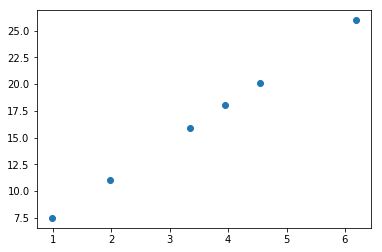

In [10]:
plt.scatter(x_approx[:,0],x_approx[:,1])
plt.show()

# PCA 3D

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [12]:
np.random.seed(2343243)


In [13]:
mean_vec1= np.array([1,1,1])
cov_mat1=np.array([[1,0,0],[0,1,0],[0,0,1]])
class1=np.random.multivariate_normal(mean_vec1,cov_mat1,100)

In [14]:
mean_vec2= np.array([1,1,1])
cov_mat2=np.array([[1,0,0],[0,1,0],[0,0,1]])
class2=np.random.multivariate_normal(mean_vec2,cov_mat2,100)

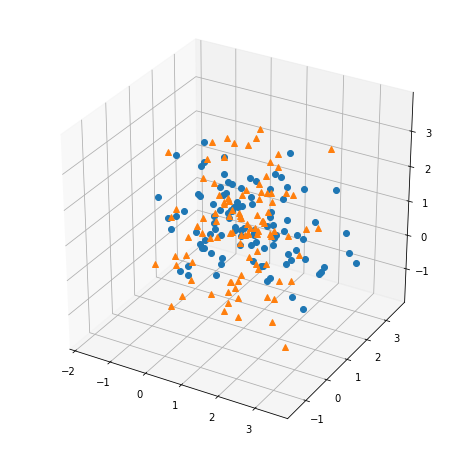

In [15]:
from mpl_toolkits.mplot3d import axes3d, proj3d
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')# 111-> 1 row 1 col and 1st entry
ax.plot(class1[:,0],class1[:,1] , class1[:,2],'o')
ax.plot(class2[:,0],class2[:,1] , class2[:,2],'^')
plt.show()

In [16]:
all_data=np.concatenate((class1,class2))

In [17]:
pca=PCA(n_components=2)
transformed_data= pca.fit_transform(all_data)
transformed_data

array([[ 5.54071564e-01, -1.73171241e-01],
       [-1.02432773e+00, -9.57950835e-01],
       [-8.00611340e-01,  6.90088529e-01],
       [-1.04180365e+00,  1.70422479e+00],
       [ 1.68603420e-01, -4.75707195e-01],
       [ 1.16802749e+00, -5.35258646e-01],
       [ 8.52716861e-01, -9.54503899e-01],
       [ 2.94327093e-01, -4.53890971e-01],
       [-1.12206482e+00,  5.20498573e-01],
       [ 2.25109356e-01, -4.46970959e-01],
       [ 6.85812963e-01,  1.30953027e+00],
       [ 4.54323905e-01, -1.00154622e+00],
       [-3.69075541e-01, -5.00256865e-01],
       [ 9.49995383e-02,  1.80004929e-01],
       [-3.96033739e-01, -1.35700421e+00],
       [ 2.19518481e-01,  1.70711639e-01],
       [ 3.53144342e-01, -1.56493634e+00],
       [ 1.50494046e+00, -1.98063064e+00],
       [ 6.10831292e-01, -1.45599715e+00],
       [-1.59818776e+00,  5.22157387e-02],
       [-3.75975643e-01,  2.68830284e-01],
       [-1.86954538e-01,  3.09878662e-01],
       [ 7.69560670e-01, -1.66067441e-01],
       [-5.

In [18]:
pca.components_ #represents important axes

array([[-0.65568085,  0.52870481,  0.53903047],
       [ 0.4293886 ,  0.84833241, -0.30977014]])

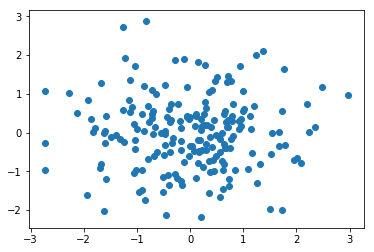

In [19]:
plt.scatter(transformed_data[:,0], transformed_data[:,1])
plt.show()

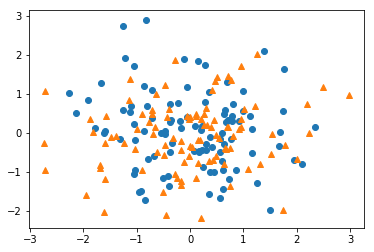

In [20]:
plt.plot(transformed_data[:100,0], transformed_data[:100,1],'o')
plt.plot(transformed_data[100:200,0], transformed_data[100:200,1],'^')
plt.show()

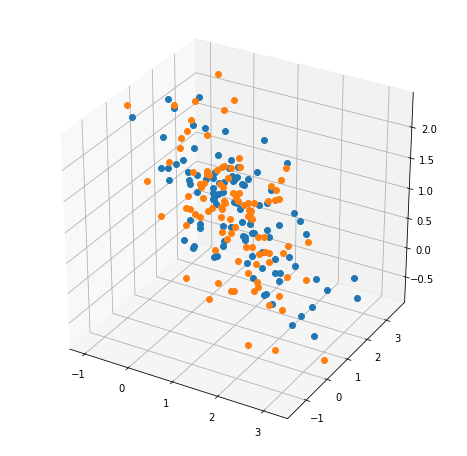

In [21]:
X_approx=pca.inverse_transform(transformed_data)
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')# 111-> 1 row 1 col and 1st entry
ax.plot(X_approx[0:100,0],X_approx[0:100,1], X_approx[0:100,2],'o')
ax.plot(X_approx[100:200,0],X_approx[100:200,1], X_approx[100:200,2],'o')
plt.show() 
# this is not actually 3d it is axes rotated to make it look like 3d

# PCA on breast cancer dataset

In [22]:
from sklearn import decomposition, linear_model, datasets
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [23]:
breast_cancer=datasets.load_breast_cancer()

In [24]:
X= breast_cancer.data
X.shape

(569, 30)

In [25]:
sc=StandardScaler()
X_std=sc.fit_transform(X)

In [26]:
# choosing k i.e n_components

In [27]:
x_train,x_test,y_train,y_test= train_test_split(X_std, breast_cancer.target,random_state=0)

In [28]:
# choosing k i.e n_components
pca=decomposition.PCA()
pca.fit_transform(x_train)
pca.explained_variance_
# we donot want to keep all 30
# so to decide

array([1.30274684e+01, 5.81556555e+00, 2.85848795e+00, 1.91901713e+00,
       1.70021491e+00, 1.20663908e+00, 6.53337152e-01, 4.26738474e-01,
       4.26450541e-01, 3.45589858e-01, 3.08054910e-01, 2.56054468e-01,
       2.28152003e-01, 1.43262745e-01, 9.26283031e-02, 7.80260477e-02,
       6.13812037e-02, 5.26182531e-02, 4.50933578e-02, 3.08275366e-02,
       3.03277956e-02, 2.51390631e-02, 2.12226717e-02, 1.77427715e-02,
       1.63886382e-02, 7.83681541e-03, 6.61084728e-03, 1.45257891e-03,
       7.98794510e-04, 1.11908784e-04])

In [29]:
total=sum(pca.explained_variance_)
k=0
current_variance=0
while current_variance/total <0.99:
    current_variance+=pca.explained_variance_[k]
    k=k+1

k

17

In [30]:
pca=decomposition.PCA(n_components=17)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test) 


In [31]:
lr=linear_model.LogisticRegression()
start=time.time()
lr.fit(x_train,y_train)
ending=time.time()
print(lr.score(x_test,y_test),"in",ending-start)


0.965034965034965 in 0.16601204872131348


In [32]:
lr=linear_model.LogisticRegression()
start=time.time()
lr.fit(x_train_pca,y_train)
ending=time.time()
print(lr.score(x_test_pca,y_test),"in",ending-start)


0.958041958041958 in 0.0038328170776367188


In [33]:
pca.explained_variance_
#  max info is getting from first few after that variance keeps on decreasing


array([13.02746837,  5.81556555,  2.85848795,  1.91901713,  1.70021491,
        1.20663908,  0.65333715,  0.42673847,  0.42645054,  0.34558986,
        0.30805491,  0.25605447,  0.228152  ,  0.14326274,  0.0926283 ,
        0.07802605,  0.0613812 ])